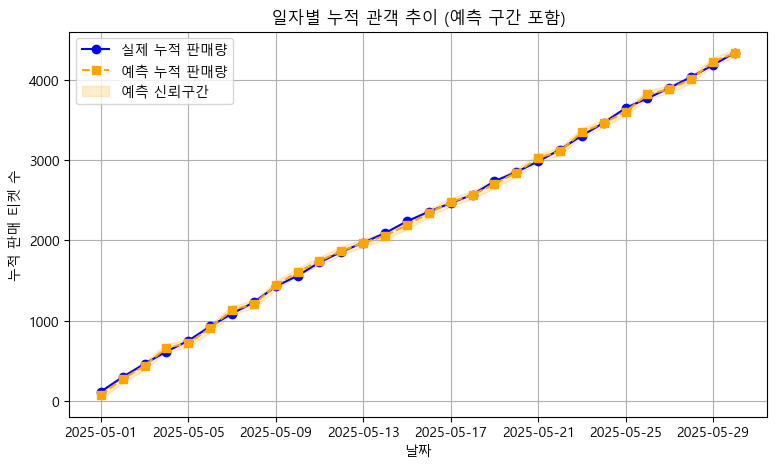

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams["axes.unicode_minus"] = False

# 30일간 날짜
dates = pd.date_range(start="2025-05-01", periods=30)
# 실제 누적 판매량 (예: 초기 100~200 티켓씩 누적)
actual_sales = np.cumsum(np.random.randint(100, 200, size=30))
# 예측 누적 판매량: 실제값에 노이즈 추가 + 예측 오차 구간 (±50)
predicted_sales = actual_sales + np.random.randint(-50, 50, size=30)
# 예측 구간: 예측값 ±50
lower_bound = predicted_sales - 50
upper_bound = predicted_sales + 50

plt.figure(figsize=(9, 5))
plt.plot(dates, actual_sales, label="실제 누적 판매량", marker="o", color="blue")
plt.plot(dates, predicted_sales, label="예측 누적 판매량", marker="s", linestyle="--", color="orange")
plt.fill_between(dates, lower_bound, upper_bound, color="orange", alpha=0.2, label="예측 신뢰구간")
plt.title("일자별 누적 관객 추이 (예측 구간 포함)")
plt.xlabel("날짜")
plt.ylabel("누적 판매 티켓 수")
plt.legend()
plt.grid(True)
plt.show()


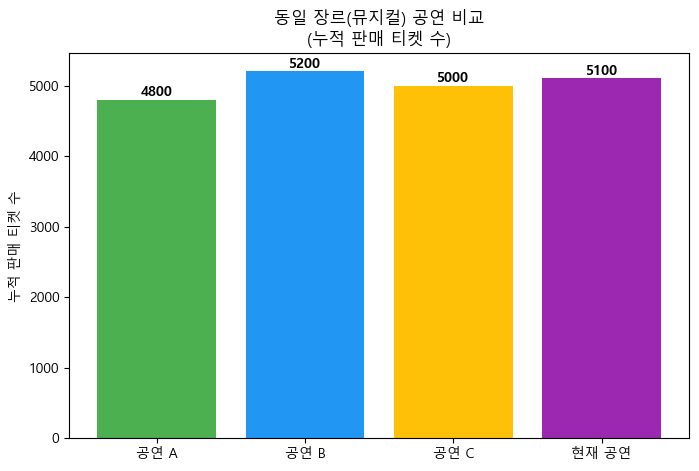

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# 과거 공연 데이터 (동일 장르 "뮤지컬")
data = {
    "performance_name": ["공연 A", "공연 B", "공연 C"],
    "genre": ["뮤지컬", "뮤지컬", "뮤지컬"],
    "accumulated_sales": [4800, 5200, 5000]
}
df_past = pd.DataFrame(data)

# 현재 기획 공연 정보 (예측 누적 판매량 5100)
current_perf = pd.DataFrame({
    "performance_name": ["현재 공연"],
    "genre": ["뮤지컬"],
    "accumulated_sales": [5100]
})

# 동일 장르인 공연 데이터에 현재 공연 결합 (pd.concat 사용)
df_compare = pd.concat([df_past, current_perf], ignore_index=True)

plt.figure(figsize=(8, 5))
bars = plt.bar(df_compare["performance_name"], df_compare["accumulated_sales"], 
               color=["#4CAF50", "#2196F3", "#FFC107", "#9C27B0"])
plt.title("동일 장르(뮤지컬) 공연 비교\n(누적 판매 티켓 수)")
plt.ylabel("누적 판매 티켓 수")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 50, f'{height:.0f}', ha="center", fontweight="bold")
plt.show()




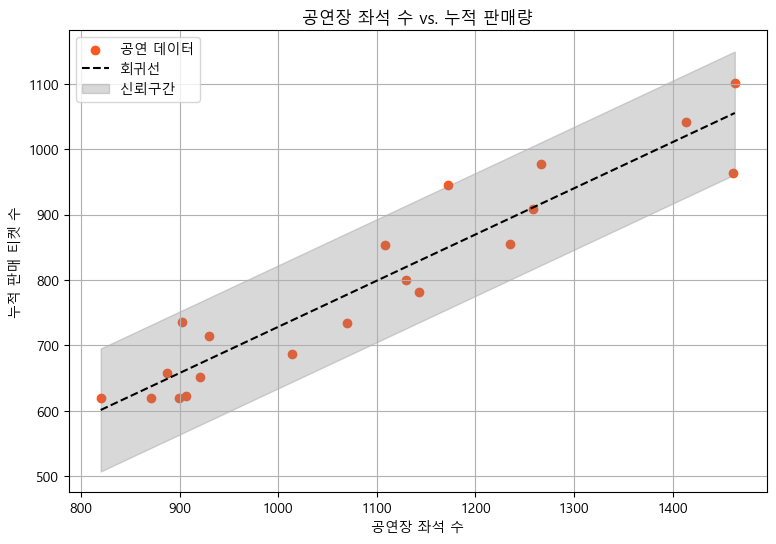

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 예시 데이터: 공연장 좌석 수와 누적 판매량 (n=20)
np.random.seed(42)
n = 20
capacities = np.random.randint(800, 1500, size=n)
accumulated_sales = (capacities * np.random.uniform(0.65, 0.85, size=n)).astype(int)

# 선형 회귀 계산 (scipy.stats.linregress 사용)
slope, intercept, r_value, p_value, std_err = stats.linregress(capacities, accumulated_sales)
reg_line = slope * np.sort(capacities) + intercept

# 예측 구간 계산 (간단한 신뢰구간)
predicted = slope * capacities + intercept
residuals = accumulated_sales - predicted
std_res = np.std(residuals)
conf_interval = 1.96 * std_res

plt.figure(figsize=(9, 6))
plt.scatter(capacities, accumulated_sales, color="#FF5722", label="공연 데이터")
plt.plot(np.sort(capacities), reg_line, color="black", linestyle="--", label="회귀선")
plt.fill_between(np.sort(capacities), 
                 slope * np.sort(capacities) + intercept - conf_interval, 
                 slope * np.sort(capacities) + intercept + conf_interval, 
                 color="gray", alpha=0.3, label="신뢰구간")
plt.title("공연장 좌석 수 vs. 누적 판매량")
plt.xlabel("공연장 좌석 수")
plt.ylabel("누적 판매 티켓 수")
plt.legend()
plt.grid(True)
plt.show()



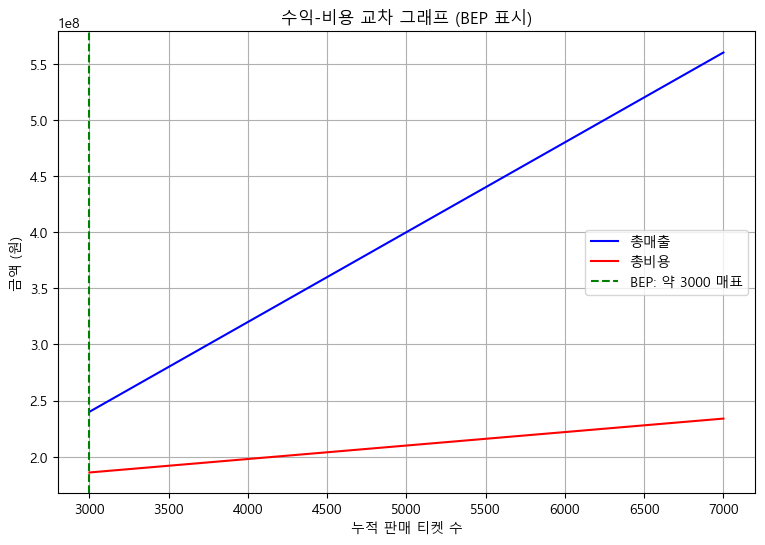

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 고정 변수 (예시)
ticket_price = 80000          # 티켓 가격 (원)
production_cost = 120000000   # 제작비 (원)
marketing_budget = 30000000   # 마케팅 예산 (원)
variable_cost_rate = 0.15     # 티켓 당 변동비율 (15%)

# 누적 판매량 범위 설정 (3000 ~ 7000)
sales_range = np.linspace(3000, 7000, 50)
total_revenue = ticket_price * sales_range
total_cost = production_cost + marketing_budget + (ticket_price * variable_cost_rate * sales_range)

# BEP 계산: 총매출 = 총비용 인 지점 근사
idx = np.argmin(np.abs(total_revenue - total_cost))
bep_value = sales_range[idx]

plt.figure(figsize=(9, 6))
plt.plot(sales_range, total_revenue, label="총매출", color="blue")
plt.plot(sales_range, total_cost, label="총비용", color="red")
plt.axvline(bep_value, color="green", linestyle="--", label=f"BEP: 약 {int(bep_value)} 매표")
plt.title("수익-비용 교차 그래프 (BEP 표시)")
plt.xlabel("누적 판매 티켓 수")
plt.ylabel("금액 (원)")
plt.legend()
plt.grid(True)
plt.show()



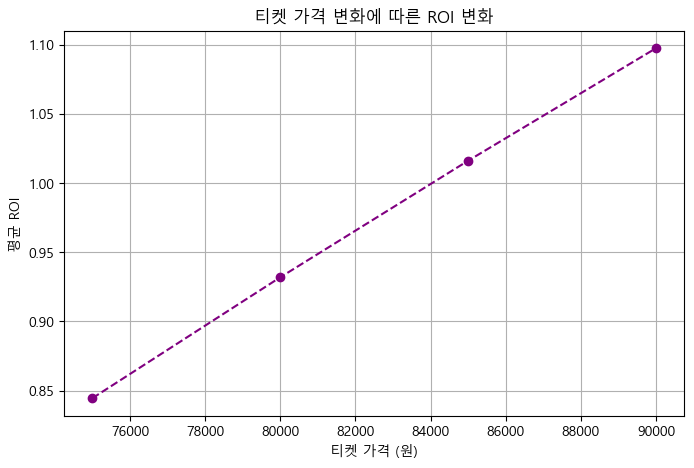

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 티켓 가격 변화 시나리오
ticket_prices = np.array([75000, 80000, 85000, 90000])
roi_values = []

# 고정 조건: 누적 판매량 5100, 다른 변수 고정
for price in ticket_prices:
    revenue = price * 5100
    cost = production_cost + marketing_budget + (price * variable_cost_rate * 5100)
    roi = (revenue - cost) / cost
    roi_values.append(roi)

plt.figure(figsize=(8, 5))
plt.plot(ticket_prices, roi_values, marker="o", linestyle="--", color="purple")
plt.title("티켓 가격 변화에 따른 ROI 변화")
plt.xlabel("티켓 가격 (원)")
plt.ylabel("평균 ROI")
plt.grid(True)
plt.show()


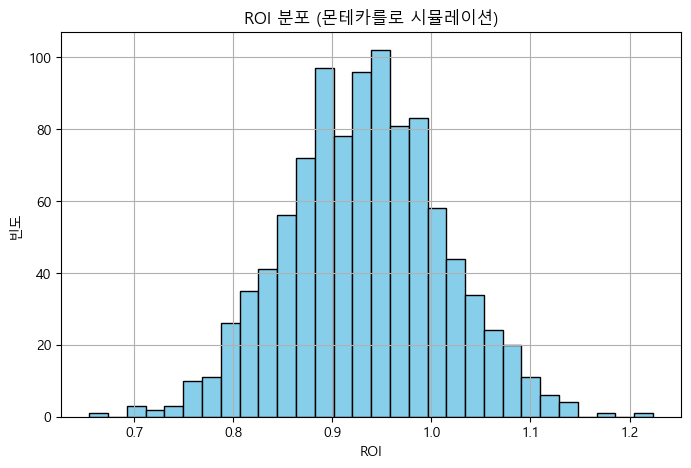

In [37]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
n_sim = 1000
# 누적 판매량: 평균 5100, 표준편차 300 (정규분포)
simulated_sales = np.random.normal(loc=5100, scale=300, size=n_sim)
simulated_sales = np.clip(simulated_sales, 3000, 7000)
roi_sim = []

for sales in simulated_sales:
    revenue_sim = ticket_price * sales
    cost_sim = production_cost + marketing_budget + (ticket_price * variable_cost_rate * sales)
    roi_sim.append((revenue_sim - cost_sim) / cost_sim)

plt.figure(figsize=(8, 5))
plt.hist(roi_sim, bins=30, color="skyblue", edgecolor="black")
plt.title("ROI 분포 (몬테카를로 시뮬레이션)")
plt.xlabel("ROI")
plt.ylabel("빈도")
plt.grid(True)
plt.show()


In [38]:
import pandas as pd

# 예시 데이터: 각 공연의 booking_rate (예: 0~1 범위)
data = {
    "공연명": ["공연 A", "공연 B", "공연 C", "현재 공연"],
    "booking_rate": [0.78, 0.65, 0.55, 0.68]
}
df = pd.DataFrame(data)

def risk_level(rate):
    if rate >= 0.75:
        return "안정 (저위험)"
    elif rate >= 0.60:
        return "중위험"
    else:
        return "고위험"

df["위험등급"] = df["booking_rate"].apply(risk_level)
print(df)


     공연명  booking_rate      위험등급
0   공연 A          0.78  안정 (저위험)
1   공연 B          0.65       중위험
2   공연 C          0.55       고위험
3  현재 공연          0.68       중위험


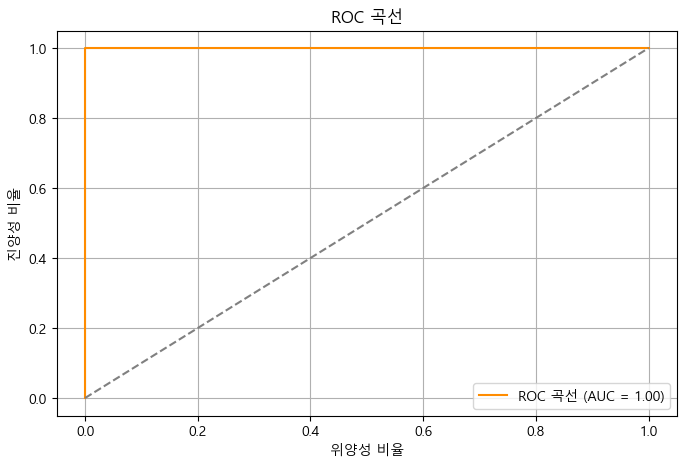

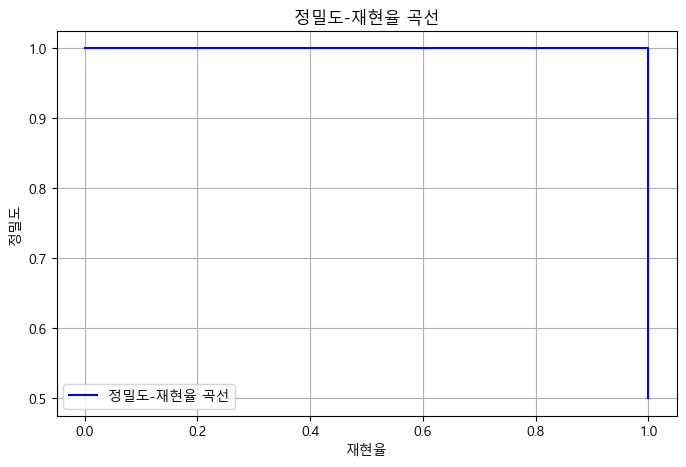

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 더미 데이터: 실제 라벨(1: 성공, 0: 부진)과 예측 확률
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0])
y_scores = np.array([0.85, 0.40, 0.78, 0.90, 0.55, 0.30, 0.80, 0.45, 0.88, 0.35])

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC 곡선 (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("위양성 비율")
plt.ylabel("진양성 비율")
plt.title("ROC 곡선")
plt.legend()
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_true, y_scores)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label="정밀도-재현율 곡선", color="blue")
plt.xlabel("재현율")
plt.ylabel("정밀도")
plt.title("정밀도-재현율 곡선")
plt.legend()
plt.grid(True)
plt.show()


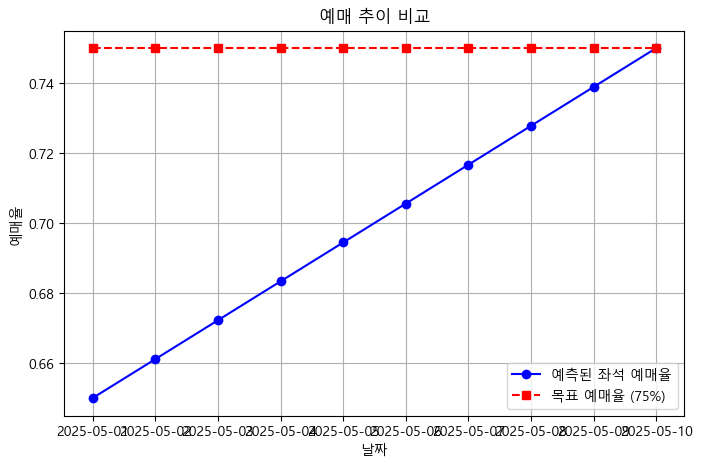

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 예시: 10일간의 예측된 booking_rate 추세 (0~1 범위)
dates = pd.date_range(start="2025-05-01", periods=10)
predicted_booking_rate = np.linspace(0.65, 0.75, 10)
target_rate = np.full(10, 0.75)

plt.figure(figsize=(8, 5))
plt.plot(dates, predicted_booking_rate, marker="o", label="예측된 좌석 예매율", color="blue")
plt.plot(dates, target_rate, marker="s", linestyle="--", label="목표 예매율 (75%)", color="red")
plt.title("예매 추이 비교")
plt.xlabel("날짜")
plt.ylabel("예매율")
plt.legend()
plt.grid(True)
plt.show()




c:\Users\USER\anaconda3\envs\ds_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but PCA is expecting 3 features as input.

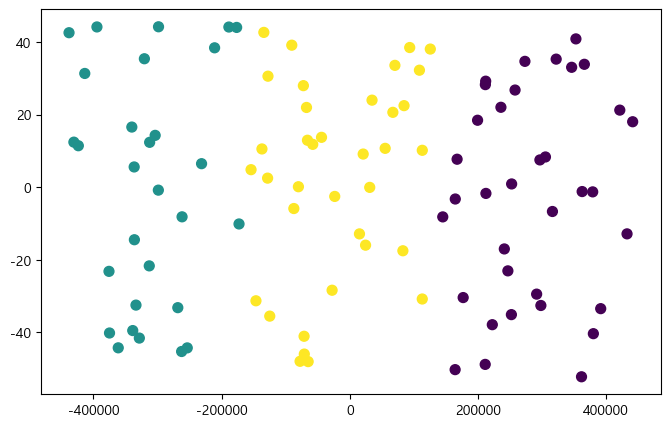

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

np.random.seed(42)
# 예시: 100명의 관객 데이터 (RFM 관련 변수)
audience_data = pd.DataFrame({
    "last_booking": np.random.randint(1, 100, 100),
    "booking_count": np.random.randint(1, 20, 100),
    "total_amount": np.random.randint(100000, 1000000, 100)
})

# PCA로 2차원 축소
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(audience_data)

# K-means 클러스터링 (3개 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(rfm_pca)

plt.figure(figsize=(8, 5))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=clusters, cmap="viridis", s=50, label="관객 데이터")
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="클러스터 중심")
plt.title("관객 데이터 2D 클러스터 산점도 (PCA 활용)")
plt.xlabel("PCA 컴포넌트 1")
plt.ylabel("PCA 컴포넌트 2")
plt.legend()
plt.grid(True)
plt.show()



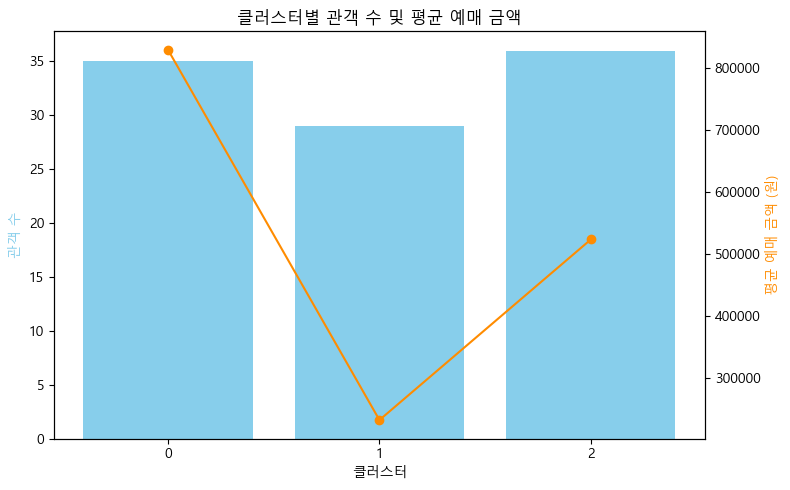

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 앞서 audience_data에 클러스터 결과 추가 (이미 clusters 변수 사용)
audience_data["Cluster"] = clusters
# 임의로 예매 금액(total_amount) 데이터를 사용 (단위: 원)
group_summary = audience_data.groupby("Cluster").agg({"booking_count": "count", "total_amount": "mean"}).reset_index()

fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()

ax1.bar(group_summary["Cluster"].astype(str), group_summary["booking_count"], color="skyblue", label="관객 수")
ax2.plot(group_summary["Cluster"].astype(str), group_summary["total_amount"], color="darkorange", marker="o", label="평균 예매 금액")

ax1.set_xlabel("클러스터")
ax1.set_ylabel("관객 수", color="skyblue")
ax2.set_ylabel("평균 예매 금액 (원)", color="darkorange")
plt.title("클러스터별 관객 수 및 평균 예매 금액")
fig.tight_layout()
plt.show()



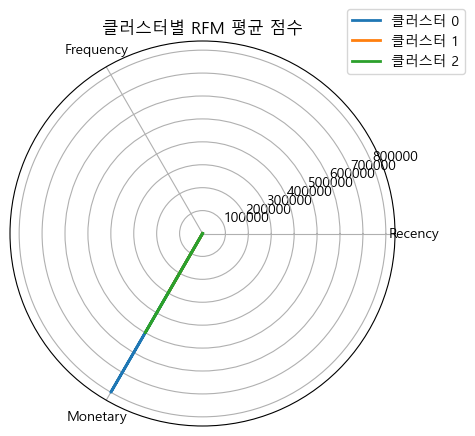

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# 예시: 각 클러스터별 RFM 평균 값 (가상 데이터)
clusters_labels = ["클러스터 0", "클러스터 1", "클러스터 2"]
recency = [30, 60, 45]       # Recency: 낮을수록 최근 (일)
frequency = [15, 5, 10]      # Frequency: 예매 횟수
monetary = [800000, 300000, 500000]  # Monetary: 누적 예매 금액 (원)

labels = np.array(["Recency", "Frequency", "Monetary"])
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, polar=True)

for i, cluster in enumerate(clusters_labels):
    values = np.array([recency[i], frequency[i], monetary[i]])
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, label=cluster, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)
plt.title("클러스터별 RFM 평균 점수")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()



In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.patches import Polygon
import matplotlib.patheffects as path_effects

# 스타일 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-v0_8-whitegrid')

# 한글 폰트가 필요한 경우 (Mac/Linux)
# plt.rcParams['font.family'] = 'NanumGothic'
# 윈도우의 경우
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 색상 팔레트 설정
COLORS = ['#4e79a7', '#f28e2c', '#e15759', '#76b7b2', '#59a14f',
          '#edc949', '#af7aa1', '#ff9da7', '#9c755f', '#bab0ab']

# 시드 설정
np.random.seed(42)
random.seed(42)

# =====================================================================
# 1. 관객 수 예측
# =====================================================================

def visualize_daily_audience_trend():
    """일자별 누적 관객 추이 라인 차트"""
    # 데이터 생성
    start_date = datetime(2024, 1, 1)
    dates = [start_date + timedelta(days=i) for i in range(30)]
    
    # 세 개의 다른 패턴을 가진 공연 데이터 생성
    daily_sales_1 = np.array([20, 30, 35, 40, 25, 15, 10, 35, 45, 55, 
                             60, 65, 70, 75, 80, 75, 70, 65, 60, 55, 
                             50, 45, 40, 35, 30, 25, 20, 15, 10, 5])
    daily_sales_2 = np.array([5, 8, 10, 15, 20, 30, 40, 50, 60, 70, 
                             80, 90, 95, 100, 105, 110, 115, 120, 115, 110, 
                             105, 100, 95, 90, 85, 80, 75, 70, 65, 60])
    daily_sales_3 = np.array([50, 55, 60, 65, 70, 75, 70, 65, 60, 55, 
                             50, 45, 40, 35, 30, 25, 20, 15, 10, 15, 
                             20, 25, 30, 35, 40, 45, 50, 55, 60, 65])
    
    # 일별 특별 이벤트 표시용 마커 포인트
    special_events = [(dates[7], daily_sales_1[7]), (dates[13], daily_sales_1[13]), (dates[22], daily_sales_1[22])]
    
    # 누적 계산
    accumulated_sales_1 = np.cumsum(daily_sales_1)
    accumulated_sales_2 = np.cumsum(daily_sales_2)
    accumulated_sales_3 = np.cumsum(daily_sales_3)
    
    # 그래프 설정
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # 그래프 그리기
    ax.plot(dates, accumulated_sales_1, label='뮤지컬 A', color=COLORS[0], linewidth=2.5, marker='o', markersize=5)
    ax.plot(dates, accumulated_sales_2, label='연극 B', color=COLORS[1], linewidth=2.5, marker='^', markersize=5)
    ax.plot(dates, accumulated_sales_3, label='콘서트 C', color=COLORS[2], linewidth=2.5, marker='s', markersize=5)
    
    # 특별 이벤트 마커 표시
    for event_date, event_sales in special_events:
        ax.plot(event_date, event_sales, 'o', markersize=12, markerfacecolor='none', 
                markeredgecolor='red', markeredgewidth=2)
    
    # 축 설정
    ax.set_xlabel('날짜', fontsize=14, fontweight='bold')
    ax.set_ylabel('누적 판매 티켓 수', fontsize=14, fontweight='bold')
    ax.set_title('일자별 누적 관객 추이', fontsize=16, fontweight='bold', pad=20)
    
    # x축 날짜 포맷 설정
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    plt.xticks(rotation=45)
    
    # 판매 추세선
    x_trend = mdates.date2num(dates)
    z = np.polyfit(x_trend, accumulated_sales_1, 1)
    p = np.poly1d(z)
    ax.plot(dates, p(x_trend), ":", color=COLORS[0], alpha=0.7, linewidth=1.5)
    
    # 그리드 및 범례 설정
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='공연 정보', fontsize=12, title_fontsize=13, loc='upper left')
    
    # 주석 추가
    ax.annotate('프로모션 이벤트', xy=(dates[7], accumulated_sales_1[7]), 
                xytext=(dates[7]-timedelta(days=2), accumulated_sales_1[7]+50),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='red'))
    
    ax.annotate('온라인 매진', xy=(dates[13], accumulated_sales_1[13]), 
                xytext=(dates[13]-timedelta(days=3), accumulated_sales_1[13]+70),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='red'))
    
    # 배경 영역 강조
    ax.axvspan(dates[20], dates[25], alpha=0.2, color='yellow', label='페스티벌 기간')
    
    # 폰트 사이즈 조정
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # 여백 조정
    plt.tight_layout()
    plt.savefig('daily_audience_trend.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


def visualize_capacity_vs_sales():
    """공연장 좌석 수와 누적 판매량 산점도"""
    # 데이터 생성
    n_performances = 40
    capacities = np.random.randint(100, 1500, n_performances)
    
    # 선형 관계에 약간의 노이즈 추가
    noise = np.random.normal(0, 100, n_performances)
    accumulated_sales = capacities * 0.85 + noise
    
    # 음수 값 방지
    accumulated_sales = np.maximum(accumulated_sales, 0)
    
    # 지역별로 다른 색상 부여
    regions = np.random.choice(['서울', '부산', '대구', '인천', '광주'], n_performances)
    region_colors = {'서울': COLORS[0], '부산': COLORS[1], '대구': COLORS[2], '인천': COLORS[3], '광주': COLORS[4]}
    colors = [region_colors[r] for r in regions]
    
    # 장르별로 다른 마커 모양 부여
    genres = np.random.choice(['뮤지컬', '연극', '콘서트', '클래식', '전시'], n_performances)
    genre_markers = {'뮤지컬': 'o', '연극': 's', '콘서트': '^', '클래식': 'D', '전시': 'P'}
    markers = [genre_markers[g] for g in genres]
    
    # 추가 변수: 티켓 가격 (마커 크기에 반영)
    ticket_prices = np.random.randint(20000, 150000, n_performances)
    sizes = ticket_prices / 1000
    
    # 그래프 설정
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # 개별 데이터 포인트 (지역, 장르별로 다른 색상과 마커)
    for i in range(n_performances):
        ax.scatter(capacities[i], accumulated_sales[i], 
                  s=sizes[i], alpha=0.7,
                  c=colors[i], marker=markers[i], 
                  edgecolors='black', linewidths=1)
    
    # 회귀선
    z = np.polyfit(capacities, accumulated_sales, 1)
    p = np.poly1d(z)
    x_line = np.linspace(min(capacities), max(capacities), 100)
    ax.plot(x_line, p(x_line), '--', color='darkgray', linewidth=2)
    
    # R-squared 값 계산 및 표시
    correlation = np.corrcoef(capacities, accumulated_sales)[0,1]
    rsquared = correlation**2
    ax.text(0.05, 0.95, f'R² = {rsquared:.2f}', transform=ax.transAxes, 
           fontsize=12, verticalalignment='top', 
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 축 설정
    ax.set_xlabel('공연장 좌석 수 (capacity)', fontsize=14, fontweight='bold')
    ax.set_ylabel('누적 판매 티켓 수 (accumulated_sales)', fontsize=14, fontweight='bold')
    ax.set_title('공연장 좌석 수와 누적 판매량', fontsize=16, fontweight='bold', pad=20)
    
    # 평균 판매율 참조선 (75%)
    ax.plot([0, max(capacities)], [0, max(capacities)*0.75], ':', color='red', 
            label='75% 판매율', linewidth=2)
    
    # 그리드 및 범례 설정
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # 지역 및 장르 범례 생성
    from matplotlib.lines import Line2D
    import matplotlib.patches as mpatches
    
    region_patches = [mpatches.Patch(color=color, label=region) 
                     for region, color in region_colors.items()]
    
    genre_handles = [Line2D([0], [0], marker=marker, color='w', 
                          markerfacecolor='gray', markersize=10, label=genre) 
                   for genre, marker in genre_markers.items()]
    
    # 두 개의 범례 추가
    first_legend = ax.legend(handles=region_patches, title='지역', loc='upper left', 
                           fontsize=10, title_fontsize=12)
    ax.add_artist(first_legend)
    
    ax.legend(handles=genre_handles, title='장르', loc='lower right', 
             fontsize=10, title_fontsize=12)
    
    # 주석 추가 (특별 케이스 표시)
    max_capacity_idx = np.argmax(capacities)
    min_sales_idx = np.argmin(accumulated_sales)
    
    ax.annotate('최대 공연장', xy=(capacities[max_capacity_idx], accumulated_sales[max_capacity_idx]), 
               xytext=(capacities[max_capacity_idx]-200, accumulated_sales[max_capacity_idx]+100),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    ax.annotate('최저 판매율', xy=(capacities[min_sales_idx], accumulated_sales[min_sales_idx]), 
               xytext=(capacities[min_sales_idx]+100, accumulated_sales[min_sales_idx]+100),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.2'))
    
    # 문자열 포맷팅을 위한 숫자 포매터 설정
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
    
    plt.tight_layout()
    plt.savefig('capacity_vs_sales.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


def visualize_genre_comparison():
    """유사 공연 대비 비교 바 차트"""
    # 데이터 생성
    genres = ['뮤지컬A', '뮤지컬B', '연극C', '연극D', '콘서트E', '콘서트F', '클래식G', '전시H']
    n_performances = len(genres)
    
    # 실제 관객 수와 예측 관객 수 
    actual_audience = np.array([1200, 980, 750, 680, 1800, 1650, 610, 450])
    predicted_audience = np.array([1150, 1050, 780, 650, 1750, 1600, 620, 500])
    
    # 예측 오차율 계산
    error_rates = (predicted_audience - actual_audience) / actual_audience * 100
    
    # 바 차트용 위치 설정
    bar_width = 0.35
    x = np.arange(n_performances)
    
    # 그래프 설정
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    # 바 차트 그리기
    bars1 = ax1.bar(x - bar_width/2, actual_audience, bar_width, label='실제 관객 수', 
                  color=COLORS[0], edgecolor='black', linewidth=1, alpha=0.8)
    bars2 = ax1.bar(x + bar_width/2, predicted_audience, bar_width, label='예측 관객 수', 
                  color=COLORS[1], edgecolor='black', linewidth=1, alpha=0.8)
    
    # 바 위에 값 표시
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width() / 2, height + 20,
                   f'{int(height):,}',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    add_value_labels(bars1)
    add_value_labels(bars2)
    
    # 두 번째 y축 추가 (오차율)
    ax2 = ax1.twinx()
    ax2.plot(x, error_rates, 'o-', color=COLORS[2], linewidth=2, label='예측 오차율 (%)')
    
    # 범례 설정
    bars_legend = ax1.legend(loc='upper left', fontsize=12)
    ax1.add_artist(bars_legend)
    ax2.legend(loc='upper right', fontsize=12)
    
    # 축 설정
    ax1.set_xlabel('공연 장르', fontsize=14, fontweight='bold')
    ax1.set_ylabel('관객 수', fontsize=14, fontweight='bold')
    ax1.set_title('장르별 실제 관객 수와 예측 관객 수 비교', fontsize=16, fontweight='bold', pad=20)
    ax2.set_ylabel('예측 오차율 (%)', fontsize=14, fontweight='bold')
    
    # 오차율 0 라인 추가
    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
    
    # X 축 레이블 설정
    ax1.set_xticks(x)
    ax1.set_xticklabels(genres, rotation=45, ha='right')
    
    # Y 축 범위 설정
    ax1.set_ylim(0, max(max(actual_audience), max(predicted_audience)) * 1.15)
    ax2.set_ylim(-20, 20)
    
    # 그리드 설정
    ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # 영역 강조
    # 높은 오차율 영역 강조
    for i, error in enumerate(error_rates):
        if abs(error) > 5:  # 오차율이 5% 이상인 경우
            ax1.axvspan(i - 0.5, i + 0.5, alpha=0.2, color='red')
    
    # 주석 추가
    max_error_idx = np.argmax(np.abs(error_rates))
    max_audience_idx = np.argmax(actual_audience)
    
    ax2.annotate(f'최대 오차: {error_rates[max_error_idx]:.1f}%', 
                xy=(max_error_idx, error_rates[max_error_idx]),
                xytext=(max_error_idx+0.5, error_rates[max_error_idx]+5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    ax1.annotate(f'최대 관객: {actual_audience[max_audience_idx]:,}명', 
                xy=(max_audience_idx, actual_audience[max_audience_idx]),
                xytext=(max_audience_idx-1, actual_audience[max_audience_idx]+100),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.2'))
    
    # 폰트 사이즈 조정
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # 여백 조정
    plt.tight_layout()
    plt.savefig('genre_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


# =====================================================================
# 2. 손익 예측 (ROI, BEP)
# =====================================================================

def visualize_revenue_cost_intersection():
    """수익-비용 교차 그래프"""
    # 파라미터 설정
    ticket_price = 30000  # 평균 티켓 가격
    production_cost = 50000000  # 제작비
    marketing_budget = 20000000  # 마케팅 비용
    variable_cost_rate = 0.3  # 티켓당 변동비 비율
    
    # 관객 수 범위
    audience_range = np.linspace(0, 5000, 100)
    
    # 수익 및 비용 계산
    revenue = ticket_price * audience_range
    total_cost = production_cost + marketing_budget + (ticket_price * variable_cost_rate * audience_range)
    profit = revenue - total_cost
    
    # BEP 계산
    fixed_cost = production_cost + marketing_budget
    bep_tickets = fixed_cost / (ticket_price * (1 - variable_cost_rate))
    
    # ROI 계산
    roi = np.zeros_like(audience_range)
    non_zero_cost = total_cost > 0
    roi[non_zero_cost] = profit[non_zero_cost] / total_cost[non_zero_cost] * 100
    
    # 그래프 설정
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1], 'hspace': 0.3})
    
    # 상단 그래프: 수익-비용 교차 그래프
    ax1.plot(audience_range, revenue / 1000000, '-', color=COLORS[0], linewidth=3, label='매출')
    ax1.plot(audience_range, total_cost / 1000000, '-', color=COLORS[1], linewidth=3, label='총비용')
    ax1.plot(audience_range, profit / 1000000, '--', color=COLORS[2], linewidth=2, label='순이익')
    
    # BEP 강조
    ax1.axvline(x=bep_tickets, color='red', linestyle='--', linewidth=2, label=f'BEP: {bep_tickets:.0f}석')
    ax1.axhline(y=0, color='gray', linestyle='-', linewidth=1)
    
    # 영역 채우기
    profit_idx = np.where(profit > 0)[0]
    if len(profit_idx) > 0:
        first_profit_idx = profit_idx[0]
        ax1.fill_between(audience_range[first_profit_idx:], 
                        profit[first_profit_idx:] / 1000000, 
                        0, 
                        color=COLORS[2], 
                        alpha=0.3,
                        label='순이익 영역')
    
    loss_idx = np.where(profit <= 0)[0]
    if len(loss_idx) > 0:
        ax1.fill_between(audience_range[loss_idx], 
                        profit[loss_idx] / 1000000, 
                        0, 
                        color=COLORS[1], 
                        alpha=0.3,
                        label='손실 영역')
    
    # BEP 주석
    ax1.annotate(f'손익분기점: {bep_tickets:.0f}석\n(총 매출: {(ticket_price*bep_tickets)/1000000:.1f}백만원)', 
                xy=(bep_tickets, (ticket_price*bep_tickets)/1000000), 
                xytext=(bep_tickets+500, (ticket_price*bep_tickets)/1000000+20),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='red'))
    
    # 하단 그래프: ROI 그래프
    ax2.plot(audience_range, roi, '-', color=COLORS[3], linewidth=3)
    ax2.axhline(y=0, color='gray', linestyle='-', linewidth=1)
    ax2.axvline(x=bep_tickets, color='red', linestyle='--', linewidth=2)
    
    # ROI 주요 지점 표시
    roi_threshold_values = [0, 20, 50, 100]  # 0%, 20%, 50%, 100% ROI
    for roi_val in roi_threshold_values:
        # ROI 값이 특정 임계값과 교차하는 점 찾기
        crossing_idx = np.where(np.diff(np.signbit(roi - roi_val)))[0]
        if len(crossing_idx) > 0:
            crossing_x = audience_range[crossing_idx[0]]
            ax2.plot(crossing_x, roi_val, 'o', markersize=8, 
                    markerfacecolor='white', markeredgecolor=COLORS[3], markeredgewidth=2)
            ax2.annotate(f'ROI {roi_val}%: {crossing_x:.0f}석', 
                        xy=(crossing_x, roi_val), 
                        xytext=(crossing_x+200, roi_val+(10 if roi_val < 50 else -10)),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    # 축 및 레이블 설정 - 첫 번째 그래프
    ax1.set_xlabel('관객 수 (명)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('금액 (백만원)', fontsize=14, fontweight='bold')
    ax1.set_title('수익-비용 교차 그래프', fontsize=16, fontweight='bold', pad=20)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(fontsize=12, loc='upper left')
    
    # 축 및 레이블 설정 - 두 번째 그래프
    ax2.set_xlabel('관객 수 (명)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('ROI (%)', fontsize=14, fontweight='bold')
    ax2.set_title('관객 수에 따른 투자수익률(ROI) 변화', fontsize=16, fontweight='bold', pad=20)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Y축 퍼센트 표시
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # 추가 정보 텍스트 상자
    textstr = '\n'.join((
        f'티켓 가격: {ticket_price:,}원',
        f'제작비: {production_cost/1000000:.1f}백만원',
        f'마케팅 비용: {marketing_budget/1000000:.1f}백만원',
        f'티켓당 변동비율: {variable_cost_rate*100:.0f}%',
        f'BEP: {bep_tickets:.0f}석'
    ))
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)
    
    # 디자인 요소 추가
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('revenue_cost_intersection.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


def visualize_roi_trend():
    """ROI 변화 라인 차트"""
    # 시간 범위
    time_periods = np.arange(1, 11)  # 10개 시점
    
    # 다양한 마케팅 예산 시나리오
    marketing_budgets = [10000000, 20000000, 30000000]  # 1천만원, 2천만원, 3천만원
    
    # 다양한 티켓 가격 시나리오
    ticket_prices = [20000, 30000, 40000]  # 2만원, 3만원, 4만원
    
    # 기본 파라미터
    production_cost = 50000000  # 제작비
    variable_cost_rate = 0.3  # 티켓당 변동비 비율
    max_capacity = 5000  # 최대 관객 수
    
    # 다양한 판매 속도 패턴 (시그모이드 함수 사용)
    def sales_pattern(time, pattern='normal'):
        if pattern == 'fast':
            return max_capacity * (1 / (1 + np.exp(-1.5 * (time - 3))))
        elif pattern == 'slow':
            return max_capacity * (1 / (1 + np.exp(-0.8 * (time - 6))))
        else:  # normal
            return max_capacity * (1 / (1 + np.exp(-1 * (time - 5))))
    
    # 그래프 설정
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
    axes = axes.flatten()
    
    # 1. 마케팅 예산별 ROI 추이
    # 다른 변수 고정
    ticket_price = 30000
    pattern = 'normal'
    
    for i, budget in enumerate(marketing_budgets):
        roi_values = []
        for time in time_periods:
            audience = sales_pattern(time, pattern)
            revenue = ticket_price * audience
            total_cost = production_cost + budget + (ticket_price * variable_cost_rate * audience)
            roi = ((revenue - total_cost) / total_cost * 100) if total_cost > 0 else 0
            roi_values.append(roi)
        
        axes[0].plot(time_periods, roi_values, '-o', linewidth=2, label=f'마케팅 {budget/1000000:.0f}백만원')
    
    # 축 및 레이블 설정
    axes[0].set_xlabel('시간 (주차)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('ROI (%)', fontsize=12, fontweight='bold')
    axes[0].set_title('마케팅 예산별 ROI 추이', fontsize=14, fontweight='bold')
    axes[0].grid(True, linestyle='--', alpha=0.7)
    axes[0].legend(fontsize=10)
    axes[0].axhline(y=0, color='gray', linestyle='-', linewidth=1)
    
    # Y축 퍼센트 표시
    axes[0].yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # 2. 티켓 가격별 ROI 추이
    # 다른 변수 고정
    marketing_budget = 20000000
    pattern = 'normal'
    
    for i, price in enumerate(ticket_prices):
        roi_values = []
        for time in time_periods:
            audience = sales_pattern(time, pattern)
            revenue = price * audience
            total_cost = production_cost + marketing_budget + (price * variable_cost_rate * audience)
            roi = ((revenue - total_cost) / total_cost * 100) if total_cost > 0 else 0
            roi_values.append(roi)
        
        axes[1].plot(time_periods, roi_values, '-o', linewidth=2, label=f'티켓 {price/1000:.0f}천원')
    
    # 축 및 레이블 설정
    axes[1].set_xlabel('시간 (주차)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('ROI (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('티켓 가격별 ROI 추이', fontsize=14, fontweight='bold')
    axes[1].grid(True, linestyle='--', alpha=0.7)
    axes[1].legend(fontsize=10)
    axes[1].axhline(y=0, color='gray', linestyle='-', linewidth=1)
    
    # Y축 퍼센트 표시
    axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # 3. 관객 유입 패턴별 ROI 추이
    # 다른 변수 고정
    marketing_budget = 20000000
    ticket_price = 30000
    
    patterns = ['fast', 'normal', 'slow']
    pattern_labels = ['초반 집중형', '일반형', '후반 상승형']
    
    for i, (pattern, label) in enumerate(zip(patterns, pattern_labels)):
        roi_values = []
        audience_values = []
        for time in time_periods:
            audience = sales_pattern(time, pattern)
            audience_values.append(audience)
            revenue = ticket_price * audience
            total_cost = production_cost + marketing_budget + (ticket_price * variable_cost_rate * audience)
            roi = ((revenue - total_cost) / total_cost * 100) if total_cost > 0 else 0
            roi_values.append(roi)
        
        axes[2].plot(time_periods, roi_values, '-o', linewidth=2, label=f'{label}')
        
        # 관객 유입 패턴 그래프에 작은 그래프로 표시
        ax_inset = axes[2].inset_axes([0.6, 0.1, 0.35, 0.35])
        ax_inset.plot(time_periods, audience_values, '-', linewidth=2, color=f'C{i}')
        ax_inset.set_title('관객 유입 패턴', fontsize=8)
        ax_inset.set_xlabel('시간', fontsize=7)
        ax_inset.set_ylabel('누적 관객', fontsize=7)
        ax_inset.tick_params(axis='both', which='major', labelsize=6)
    
    # 축 및 레이블 설정
    axes[2].set_xlabel('시간 (주차)', fontsize=12, fontweight='bold')
    axes[2].set_ylabel('ROI (%)', fontsize=12, fontweight='bold')
    axes[2].set_title('관객 유입 패턴별 ROI 추이', fontsize=14, fontweight='bold')
    axes[2].grid(True, linestyle='--', alpha=0.7)
    axes[2].legend(fontsize=10)
    axes[2].axhline(y=0, color='gray', linestyle='-', linewidth=1)
    
    # Y축 퍼센트 표시
    axes[2].yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # 4. 몬테카를로 시뮬레이션을 통한 ROI 분포
    # 시뮬레이션 파라미터
    n_simulations = 1000
    marketing_budget = 20000000
    ticket_price = 30000
    
    # 불확실성 파라미터 (정규분포 가정)
    audience_mean = 3000
    audience_std = 500
    production_cost_mean = 50000000
    production_cost_std = 5000000
    variable_cost_rate_mean = 0.3
    variable_cost_std = 0.05
    
    # 몬테카를로 시뮬레이션
    roi_results = []
    for _ in range(n_simulations):
        # 랜덤 변수 생성
        audience = np.random.normal(audience_mean, audience_std)
        audience = max(0, audience)  # 음수 방지
        production_cost = np.random.normal(production_cost_mean, production_cost_std)
        production_cost = max(0, production_cost)  # 음수 방지
        variable_cost_rate = np.random.normal(variable_cost_rate_mean, variable_cost_std)
        variable_cost_rate = max(0, min(1, variable_cost_rate))  # 0-1 사이 값으로 제한
        
        # ROI 계산
        revenue = ticket_price * audience
        total_cost = production_cost + marketing_budget + (ticket_price * variable_cost_rate * audience)
        roi = ((revenue - total_cost) / total_cost * 100) if total_cost > 0 else 0
        roi_results.append(roi)
    
    # 히스토그램
    axes[3].hist(roi_results, bins=30, color=COLORS[5], alpha=0.7, edgecolor='black')
    
    # 확률 밀도 함수 추가
    sns.kdeplot(roi_results, ax=axes[3], color='red', linewidth=2)
    
    # 통계값 계산
    roi_mean = np.mean(roi_results)
    roi_median = np.median(roi_results)
    roi_std = np.std(roi_results)
    roi_5pct = np.percentile(roi_results, 5)
    roi_95pct = np.percentile(roi_results, 95)
    
    # 통계값 표시
    axes[3].axvline(x=roi_mean, color='blue', linestyle='-', linewidth=2, label=f'평균: {roi_mean:.1f}%')
    axes[3].axvline(x=roi_median, color='green', linestyle='--', linewidth=2, label=f'중앙값: {roi_median:.1f}%')
    axes[3].axvline(x=roi_5pct, color='red', linestyle=':', linewidth=2, label=f'5% 분위수: {roi_5pct:.1f}%')
    axes[3].axvline(x=roi_95pct, color='red', linestyle=':', linewidth=2, label=f'95% 분위수: {roi_95pct:.1f}%')
    
    # 축 및 레이블 설정
    axes[3].set_xlabel('ROI (%)', fontsize=12, fontweight='bold')
    axes[3].set_ylabel('빈도', fontsize=12, fontweight='bold')
    axes[3].set_title('몬테카를로 시뮬레이션 ROI 분포', fontsize=14, fontweight='bold')
    axes[3].grid(True, linestyle='--', alpha=0.7)
    axes[3].legend(fontsize=10)
    
    # X축 퍼센트 표시
    axes[3].xaxis.set_major_formatter(mtick.PercentFormatter())
    
    # 시뮬레이션 정보 텍스트 상자
    textstr = '\n'.join((
        f'시뮬레이션 횟수: {n_simulations:,}회',
        f'평균 ROI: {roi_mean:.1f}%',
        f'표준편차: {roi_std:.1f}%',
        f'손실 확률: {(np.sum(np.array(roi_results) < 0) / n_simulations * 100):.1f}%',
    ))
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    axes[3].text(0.02, 0.98, textstr, transform=axes[3].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig('roi_trend.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


def visualize_monte_carlo_simulation():
    """몬테카를로 시뮬레이션 결과 분포"""
    # 시뮬레이션 파라미터
    n_simulations = 1000
    
    # 기본 파라미터 (평균값)
    production_cost_mean = 50000000  # 제작비
    marketing_budget_mean = 20000000  # 마케팅 예산
    ticket_price_mean = 30000  # 티켓 가격
    capacity_mean = 1000  # 공연장 좌석수
    variable_cost_rate_mean = 0.3  # 변동비 비율
    ticket_sales_rate_mean = 0.75  # 판매율
    
    # 불확실성 (표준편차)
    production_cost_std = 5000000
    marketing_budget_std = 2000000
    ticket_price_std = 3000
    capacity_std = 100
    variable_cost_rate_std = 0.05
    ticket_sales_rate_std = 0.15
    
    # 결과 저장용 배열
    roi_results = []
    bep_results = []
    profit_results = []
    
    # 몬테카를로 시뮬레이션
    for _ in range(n_simulations):
        # 랜덤 변수 생성 (정규분포에서 샘플링)
        production_cost = max(10000000, np.random.normal(production_cost_mean, production_cost_std))
        marketing_budget = max(5000000, np.random.normal(marketing_budget_mean, marketing_budget_std))
        ticket_price = max(10000, np.random.normal(ticket_price_mean, ticket_price_std))
        capacity = max(100, np.random.normal(capacity_mean, capacity_std))
        variable_cost_rate = max(0.1, min(0.5, np.random.normal(variable_cost_rate_mean, variable_cost_rate_std)))
        ticket_sales_rate = max(0.3, min(1.0, np.random.normal(ticket_sales_rate_mean, ticket_sales_rate_std)))
        
        # 판매 티켓 수
        sold_tickets = capacity * ticket_sales_rate
        
        # 손익 지표 계산
        total_revenue = ticket_price * sold_tickets
        total_variable_cost = ticket_price * variable_cost_rate * sold_tickets
        total_fixed_cost = production_cost + marketing_budget
        total_cost = total_fixed_cost + total_variable_cost
        profit = total_revenue - total_cost
        
        # ROI 계산
        roi = (profit / total_cost) * 100 if total_cost > 0 else 0
        
        # BEP 계산
        bep_tickets = total_fixed_cost / (ticket_price * (1 - variable_cost_rate))
        
        # 결과 저장
        roi_results.append(roi)
        bep_results.append(bep_tickets)
        profit_results.append(profit)
    
    # 그래프 설정
    fig = plt.figure(figsize=(16, 12))
    gs = GridSpec(3, 3, figure=fig)
    
    # 1. ROI 히스토그램
    ax1 = fig.add_subplot(gs[0, :2])
    bins = np.linspace(min(roi_results), max(roi_results), 30)
    ax1.hist(roi_results, bins=bins, alpha=0.7, color=COLORS[0], edgecolor='black')
    
    # 통계값 표시
    roi_mean = np.mean(roi_results)
    roi_median = np.median(roi_results)
    roi_std = np.std(roi_results)
    roi_5pct = np.percentile(roi_results, 5)
    roi_95pct = np.percentile(roi_results, 95)
    
    ax1.axvline(x=roi_mean, color='red', linestyle='-', linewidth=2, label=f'평균: {roi_mean:.1f}%')
    ax1.axvline(x=roi_median, color='blue', linestyle='--', linewidth=2, label=f'중앙값: {roi_median:.1f}%')
    ax1.axvline(x=roi_5pct, color='green', linestyle=':', linewidth=2, label=f'5% 분위수: {roi_5pct:.1f}%')
    ax1.axvline(x=roi_95pct, color='green', linestyle=':', linewidth=2, label=f'95% 분위수: {roi_95pct:.1f}%')
    
    # 축 및 레이블 설정
    ax1.set_xlabel('ROI (%)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('빈도', fontsize=12, fontweight='bold')
    ax1.set_title('ROI 분포', fontsize=14, fontweight='bold')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(fontsize=10)
    
    # X축 퍼센트 표시
    ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
    
    # 2. BEP 히스토그램
    ax2 = fig.add_subplot(gs[1, :2])
    bins = np.linspace(min(bep_results), max(bep_results), 30)
    ax2.hist(bep_results, bins=bins, alpha=0.7, color=COLORS[1], edgecolor='black')
    
    # 통계값 표시
    bep_mean = np.mean(bep_results)
    bep_median = np.median(bep_results)
    bep_std = np.std(bep_results)
    bep_5pct = np.percentile(bep_results, 5)
    bep_95pct = np.percentile(bep_results, 95)
    
    ax2.axvline(x=bep_mean, color='red', linestyle='-', linewidth=2, label=f'평균: {bep_mean:.0f}석')
    ax2.axvline(x=bep_median, color='blue', linestyle='--', linewidth=2, label=f'중앙값: {bep_median:.0f}석')
    ax2.axvline(x=bep_5pct, color='green', linestyle=':', linewidth=2, label=f'5% 분위수: {bep_5pct:.0f}석')
    ax2.axvline(x=bep_95pct, color='green', linestyle=':', linewidth=2, label=f'95% 분위수: {bep_95pct:.0f}석')
    
    # 축 및 레이블 설정
    ax2.set_xlabel('BEP (석)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('빈도', fontsize=12, fontweight='bold')
    ax2.set_title('손익분기점(BEP) 분포', fontsize=14, fontweight='bold')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(fontsize=10)
    
    # 3. 순이익 히스토그램
    ax3 = fig.add_subplot(gs[1, 0])
    
    for i, (name, color) in enumerate(zip(cluster_names, colors)):
        mask = clusters == i
        ax3.scatter(frequency[mask], monetary[mask], c=color, s=50, alpha=0.7, edgecolors='w')
    
    # 클러스터 중심점 표시
    for i, (center, color) in enumerate(zip(centers, colors)):
        ax3.scatter(center[1], center[2], c=color, marker='*', s=200, edgecolors='black')
    
    # 축 레이블
    ax3.set_xlabel('구매빈도 (회)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('구매금액 (만원)', fontsize=12, fontweight='bold')
    
    # 제목
    ax3.set_title('구매빈도 vs 구매금액', fontsize=14, fontweight='bold')
    
    # 그리드
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # 클러스터 특성 요약 표
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.axis('tight')
    ax4.axis('off')
    
    # 테이블 데이터
    table_data = [['클러스터', '규모', '최근성 (일)', '구매빈도 (회)', '구매금액 (만원)', '평균연령']]
    
    for i, name in enumerate(cluster_names):
        feature = cluster_features[i]
        table_data.append([
            name, 
            f"{feature['size']}명", 
            f"{feature['recency']:.1f}", 
            f"{feature['frequency']:.1f}", 
            f"{feature['monetary']:.1f}", 
            f"{feature['age']:.1f}"
        ])
    
    # 클러스터 색상과 일치하는 테이블 색상
    cell_colors = [['white'] * 6]
    for i, color in enumerate(colors):
        row_colors = ['white'] * 6
        row_colors[0] = color
        cell_colors.append(row_colors)
    
    # 테이블 생성
    table = ax4.table(cellText=table_data,
                   cellColours=cell_colors,
                   cellLoc='center',
                   loc='center')
    
    # 테이블 스타일링
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # 헤더 행
            cell.set_text_props(weight='bold', color='black')
        elif j == 0:  # 클러스터 이름 열
            # 클러스터 색상에 따라 텍스트 색상 대비 처리
            if i in [1, 2]:  # 더 밝은 색상 클러스터
                cell.set_text_props(weight='bold', color='black')
            else:  # 더 어두운 색상 클러스터
                cell.set_text_props(weight='bold', color='white')
    
    # 테이블 제목
    ax4.set_title('클러스터별 특성 요약', fontsize=14, fontweight='bold')
    
    plt.suptitle('관객 세분화 분석: K-means 클러스터링', fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('cluster_scatter.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


def visualize_cluster_bar():
    """그룹별 인원수 및 평균 예매 금액 바 차트"""
    # 클러스터 데이터
    clusters = ['충성 고객층', '중간 가치층', '신규 고객층', '잠재 고객층']
    
    # 각 클러스터 특성
    counts = [250, 450, 350, 650]
    avg_amounts = [185000, 95000, 150000, 45000]
    avg_frequency = [12.5, 5.8, 3.2, 1.5]
    
    # 클러스터 특성 딕셔너리
    cluster_features = {
        '충성 고객층': {
            'recency': 15,  # 최근 15일 이내 관람
            'frequency': 12.5,  # 연간 12.5회 관람
            'monetary': 185000,  # 평균 18.5만원 지출
            'age_range': '30-45세',
            'preferred_genre': '뮤지컬',
            'description': '높은 방문 빈도와 큰 지출 규모를 보이는 핵심 고객층'
        },
        '중간 가치층': {
            'recency': 45,
            'frequency': 5.8,
            'monetary': 95000,
            'age_range': '40-55세',
            'preferred_genre': '클래식/오페라',
            'description': '중간 정도의 방문 빈도와 지출을 보이는 고객층'
        },
        '신규 고객층': {
            'recency': 20,
            'frequency': 3.2,
            'monetary': 150000,
            'age_range': '25-35세',
            'preferred_genre': '콘서트/공연',
            'description': '최근 방문한 신규 관객으로 높은 지출 성향'
        },
        '잠재 고객층': {
            'recency': 90,
            'frequency': 1.5,
            'monetary': 45000,
            'age_range': '전 연령대',
            'preferred_genre': '다양함',
            'description': '방문 빈도가 낮고 최근 방문이 적은 저관여 고객층'
        }
    }
    
    # 그래프 설정
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
    
    # 각 클러스터 색상 설정
    colors = [COLORS[i] for i in range(4)]
    
    # 인원수 바 차트
    bars1 = ax1.bar(clusters, counts, color=colors, edgecolor='black', linewidth=1, alpha=0.7)
    
    # 바 위에 인원수 표시
    for bar, count in zip(bars1, counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{count}명',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # 축 및 레이블 설정
    ax1.set_xlabel('고객 세그먼트', fontsize=12, fontweight='bold')
    ax1.set_ylabel('인원수', fontsize=12, fontweight='bold')
    ax1.set_title('클러스터별 인원수', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Y축 범위 조정
    ax1.set_ylim(0, max(counts) * 1.15)
    
    # 평균 예매 금액 바 차트
    bars2 = ax2.bar(clusters, avg_amounts, color=colors, edgecolor='black', linewidth=1, alpha=0.7)
    
    # 이차 Y축 - 방문 빈도
    ax2_2 = ax2.twinx()
    line = ax2_2.plot(clusters, avg_frequency, 'o-', color='red', linewidth=2, label='평균 방문 빈도')
    
    # 바 위에 금액 표시
    for bar, amount in zip(bars2, avg_amounts):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 5000,
                f'{amount:,}원',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # 축 및 레이블 설정
    ax2.set_xlabel('고객 세그먼트', fontsize=12, fontweight='bold')
    ax2.set_ylabel('평균 예매 금액', fontsize=12, fontweight='bold')
    ax2_2.set_ylabel('평균 방문 빈도 (연간)', fontsize=12, fontweight='bold', color='red')
    ax2.set_title('클러스터별 평균 예매 금액 및 방문 빈도', fontsize=14, fontweight='bold')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Y축 범위 조정
    ax2.set_ylim(0, max(avg_amounts) * 1.15)
    ax2_2.set_ylim(0, max(avg_frequency) * 1.3)
    
    # 축 색상 맞추기
    ax2_2.tick_params(axis='y', colors='red')
    ax2_2.spines['right'].set_color('red')
    
    # 그룹별 특성 요약 정보 추가
    for i, cluster in enumerate(clusters):
        features = cluster_features[cluster]
        
        # 텍스트 내용
        textstr = '\n'.join((
            f'{cluster}',
            f'최근 방문: {features["recency"]}일 이내',
            f'선호 장르: {features["preferred_genre"]}',
            f'연령대: {features["age_range"]}',
            f'특징: {features["description"]}'
        ))
        
        # 바 차트 아래 텍스트 박스
        props = dict(boxstyle='round', facecolor=colors[i], alpha=0.2)
        fig.text(0.1 + i * 0.22, 0.05, textstr, fontsize=9,
                verticalalignment='bottom', horizontalalignment='left',
                bbox=props)
    
    # 전체 제목
    plt.suptitle('관객 세분화: 클러스터별 규모 및 가치', fontsize=16, fontweight='bold')
    
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    plt.savefig('cluster_bar.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


def visualize_radar_chart():
    """Radar 차트"""
    # 클러스터 이름
    clusters = ['충성 고객층', '중간 가치층', '신규 고객층', '잠재 고객층']
    
    # RFM 점수 및 추가 특성 (0-100 스케일)
    # [Recency, Frequency, Monetary, 온라인활동, 마케팅반응도, SNS영향력]
    cluster_scores = np.array([
        [90, 95, 85, 70, 75, 60],  # 충성 고객층
        [60, 65, 75, 30, 40, 55],  # 중간 가치층
        [85, 40, 70, 90, 65, 80],  # 신규 고객층
        [30, 25, 30, 50, 35, 45]   # 잠재 고객층
    ])
    
    # 특성 레이블
    categories = ['Recency', 'Frequency', 'Monetary', 
                'Online Activity', 'Marketing Response', 'SNS Influence']
    
    # 범주 수
    N = len(categories)
    
    # 각도 계산
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    
    # 첫 번째 각도 반복 (그래프를 닫기 위해)
    angles += angles[:1]
    
    # 클러스터 점수도 마찬가지로 첫 번째 항목 추가
    cluster_scores_closed = np.column_stack((cluster_scores, cluster_scores[:, 0]))
    
    # 그래프 설정
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # 색상 설정
    colors = [COLORS[i] for i in range(4)]
    
    # 각 클러스터에 대한 레이더 차트 그리기
    for i, cluster in enumerate(clusters):
        values = cluster_scores_closed[i].tolist()
        ax.plot(angles, values, 'o-', linewidth=2, label=cluster, color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    # 축 레이블 설정
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
    
    # Y축 눈금 설정
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=10)
    ax.set_ylim(0, 100)
    
    # 그리드 및 테두리 설정
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # 제목 및 범례
    plt.title('고객 세그먼트별 RFM 및 행동 특성', fontsize=16, fontweight='bold', pad=20)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    # 클러스터별 설명 추가
    descriptions = [
        "충성 고객층: 높은 충성도와 지속적인 방문, 큰 지출 규모",
        "중간 가치층: 안정적인 방문과 중간 수준의 지출",
        "신규 고객층: 최근 유입되었으며 높은 온라인 활동, 높은 성장 잠재력",
        "잠재 고객층: 낮은 방문 빈도와 적은 지출, 활성화 필요"
    ]
    
    for i, desc in enumerate(descriptions):
        # 글자에 테두리 효과 추가하여 가독성 향상
        text = ax.text(0.5, 0.95 - i*0.05, desc, transform=ax.figure.transFigure,
                     ha='center', fontsize=10,
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor=colors[i], boxstyle='round'))
        text.set_path_effects([path_effects.withStroke(linewidth=1, foreground=colors[i])])
    
    # 각 특성에 대한 설명 추가
    feature_desc = {
        'Recency': '최근 방문 정도',
        'Frequency': '방문 빈도',
        'Monetary': '지출 금액',
        'Online Activity': '웹사이트 및 앱 사용 빈도',
        'Marketing Response': '마케팅 캠페인 반응률',
        'SNS Influence': '소셜 미디어 영향력'
    }
    
    # 방사형 차트 주변에 특성 설명 추가
    for i, cat in enumerate(categories):
        angle_rad = angles[i]
        if 0 <= angle_rad < np.pi/2 or 3*np.pi/2 < angle_rad <= 2*np.pi:
            ha, distance = 'left', 10
        else:
            ha, distance = 'right', 10
        
        # 특성 이름 주변에 작은 설명 추가
        ax.annotate(feature_desc[cat],
                  xy=(angle_rad, 105),  # 특성 이름 바깥에 위치
                  xytext=(angle_rad, 115),
                  ha=ha, fontsize=8,
                  bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('radar_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


# =====================================================================
# 메인 함수: 모든 시각화 실행
# =====================================================================

def generate_all_visualizations():
    """모든 시각화 생성 및 저장"""
    print("1. 관객 수 예측 시각화 생성 중...")
    visualize_daily_audience_trend()
    visualize_capacity_vs_sales()
    visualize_genre_comparison()
    
    print("2. 손익 예측 시각화 생성 중...")
    visualize_revenue_cost_intersection()
    visualize_roi_trend()
    visualize_monte_carlo_simulation()
    
    print("3. 티켓 판매 위험 예측 시각화 생성 중...")
    visualize_risk_table()
    visualize_roc_pr_curve()
    visualize_booking_trend()
    
    print("4. 관객 세분화 시각화 생성 중...")
    visualize_cluster_scatter()
    visualize_cluster_bar()
    visualize_radar_chart()
    
    print("모든 시각화가 성공적으로 생성되었습니다.")


if __name__ == "__main__":
    generate_all_visualizations()(gs[2, :2])
    bins = np.linspace(min(profit_results), max(profit_results), 30)
    ax3.hist(profit_results, bins=bins, alpha=0.7, color=COLORS[2], edgecolor='black')
    
    # 통계값 표시
    profit_mean = np.mean(profit_results)
    profit_median = np.median(profit_results)
    profit_std = np.std(profit_results)
    profit_5pct = np.percentile(profit_results, 5)
    profit_95pct = np.percentile(profit_results, 95)
    
    ax3.axvline(x=profit_mean, color='red', linestyle='-', linewidth=2, 
               label=f'평균: {profit_mean/1000000:.1f}백만원')
    ax3.axvline(x=profit_median, color='blue', linestyle='--', linewidth=2, 
               label=f'중앙값: {profit_median/1000000:.1f}백만원')
    ax3.axvline(x=profit_5pct, color='green', linestyle=':', linewidth=2, 
               label=f'5% 분위수: {profit_5pct/1000000:.1f}백만원')
    ax3.axvline(x=profit_95pct, color='green', linestyle=':', linewidth=2, 
               label=f'95% 분위수: {profit_95pct/1000000:.1f}백만원')
    ax3.axvline(x=0, color='black', linestyle='-', linewidth=1)
    
    # 축 및 레이블 설정
    ax3.set_xlabel('순이익 (원)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('빈도', fontsize=12, fontweight='bold')
    ax3.set_title('순이익 분포', fontsize=14, fontweight='bold')
    ax3.grid(True, linestyle='--', alpha=0.7)
    ax3.legend(fontsize=10)
    
    # X축 단위 백만원으로 표시
    ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000000)}백만"))
    
    # 4. ROI vs BEP 산점도
    ax4 = fig.add_subplot(gs[0, 2])
    scatter = ax4.scatter(bep_results, roi_results, c=profit_results, cmap='viridis', 
                         alpha=0.6, edgecolors='gray', linewidths=0.5)
    
    # 색상바 추가
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label('순이익 (원)', rotation=270, labelpad=20)
    cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000000)}백만"))
    
    # 축 및 레이블 설정
    ax4.set_xlabel('BEP (석)', fontsize=12, fontweight='bold')
    ax4.set_ylabel('ROI (%)', fontsize=12, fontweight='bold')
    ax4.set_title('ROI vs BEP 관계', fontsize=14, fontweight='bold')
    ax4.grid(True, linestyle='--', alpha=0.7)
    
    # Y축 퍼센트 표시
    ax4.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # 5. 수익성과 리스크 박스플롯
    ax5 = fig.add_subplot(gs[1, 2])
    
    # ROI 범위에 따라 그룹화
    roi_ranges = [(-np.inf, 0), (0, 20), (20, 50), (50, np.inf)]
    roi_labels = ['손실', '저수익\n(0~20%)', '중수익\n(20~50%)', '고수익\n(50%+)']
    grouped_profits = []
    
    for lower, upper in roi_ranges:
        group_profits = [p for r, p in zip(roi_results, profit_results) if lower <= r < upper]
        grouped_profits.append(group_profits)
    
    # 박스플롯 생성
    box = ax5.boxplot(grouped_profits, patch_artist=True, labels=roi_labels)
    
    # 박스 색상 설정
    colors = [COLORS[i] for i in range(len(roi_ranges))]
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # 축 및 레이블 설정
    ax5.set_xlabel('ROI 범위', fontsize=12, fontweight='bold')
    ax5.set_ylabel('순이익 (원)', fontsize=12, fontweight='bold')
    ax5.set_title('ROI 범위별 순이익 분포', fontsize=14, fontweight='bold')
    ax5.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Y축 단위 백만원으로 표시
    ax5.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000000)}백만"))
    
    # 0 라인 추가
    ax5.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # 6. 위험과 수익의 트레이드오프 곡선
    ax6 = fig.add_subplot(gs[2, 2])
    
    # 판매율 시나리오
    sales_rates = np.linspace(0.4, 1.0, 100)
    
    # 기본 파라미터 고정
    production_cost = production_cost_mean
    marketing_budget = marketing_budget_mean
    ticket_price = ticket_price_mean
    capacity = capacity_mean
    variable_cost_rate = variable_cost_rate_mean
    
    # 각 판매율에 대한 ROI와 표준편차 계산
    roi_by_sales = []
    risk_by_sales = []
    
    for rate in sales_rates:
        roi_samples = []
        
        # 각 판매율에 대한 작은 몬테카를로 시뮬레이션
        for _ in range(100):
            # 약간의 랜덤성 추가
            sales_noise = np.random.normal(0, 0.05)  # 5% 표준편차
            actual_rate = max(0.2, min(1.0, rate + sales_noise))
            sold_tickets = capacity * actual_rate
            
            # 손익 계산
            total_revenue = ticket_price * sold_tickets
            total_cost = production_cost + marketing_budget + (ticket_price * variable_cost_rate * sold_tickets)
            profit = total_revenue - total_cost
            
            # ROI 계산
            roi = (profit / total_cost) * 100 if total_cost > 0 else 0
            roi_samples.append(roi)
        
        # 평균 ROI와 리스크(표준편차)
        mean_roi = np.mean(roi_samples)
        std_roi = np.std(roi_samples)
        
        roi_by_sales.append(mean_roi)
        risk_by_sales.append(std_roi)
    
    # 산점도 그리기 (크기는 판매율 반영)
    sizes = sales_rates * 100
    scatter = ax6.scatter(risk_by_sales, roi_by_sales, c=sales_rates, cmap='cool', 
                         s=sizes, alpha=0.7, edgecolors='gray', linewidths=0.5)
    
    # 색상바 추가
    cbar = plt.colorbar(scatter, ax=ax6)
    cbar.set_label('판매율', rotation=270, labelpad=20)
    cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # 축 및 레이블 설정
    ax6.set_xlabel('리스크 (ROI 표준편차)', fontsize=12, fontweight='bold')
    ax6.set_ylabel('기대 ROI (%)', fontsize=12, fontweight='bold')
    ax6.set_title('위험-수익 트레이드오프', fontsize=14, fontweight='bold')
    ax6.grid(True, linestyle='--', alpha=0.7)
    
    # 일부 포인트에 레이블 추가
    for i, rate in enumerate(sales_rates):
        if i % 20 == 0:  # 간격을 두고 레이블 표시
            ax6.annotate(f'{rate:.0%}',
                        (risk_by_sales[i], roi_by_sales[i]),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8)
    
    # Y축 퍼센트 표시
    ax6.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # 0 라인 추가
    ax6.axhline(y=0, color='black', linestyle='-', linewidth=1)
    
    # 시뮬레이션 요약 정보
    fig.suptitle('몬테카를로 시뮬레이션: 손익 예측의 불확실성 분석', fontsize=18, fontweight='bold', y=0.98)
    
    # 시뮬레이션 정보 텍스트 상자
    textstr = '\n'.join((
        f'시뮬레이션 횟수: {n_simulations:,}회',
        f'평균 ROI: {roi_mean:.1f}% (±{roi_std:.1f}%)',
        f'평균 BEP: {bep_mean:.0f}석 (±{bep_std:.0f}석)',
        f'평균 순이익: {profit_mean/1000000:.1f}백만원 (±{profit_std/1000000:.1f}백만원)',
        f'손실 확률: {(np.sum(np.array(profit_results) < 0) / n_simulations * 100):.1f}%',
    ))
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    fig.text(0.5, 0.91, textstr, fontsize=12, verticalalignment='top', horizontalalignment='center',
            bbox=props)
    
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.savefig('monte_carlo_simulation.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


# =====================================================================
# 3. 티켓 판매 위험 예측
# =====================================================================

def visualize_risk_table():
    """과거 공연 리스트 테이블(위험도 표시)"""
    # 데이터 생성
    n_performances = 12
    titles = [f'공연{i+1}' for i in range(n_performances)]
    genres = np.random.choice(['뮤지컬', '연극', '콘서트', '클래식', '전시'], n_performances)
    regions = np.random.choice(['서울', '부산', '대구', '인천', '광주'], n_performances)
    booking_rates = np.random.uniform(40, 95, n_performances)
    
    # 위험도 분류
    def get_risk_level(rate):
        if rate >= 75:
            return '저위험'
        elif rate >= 60:
            return '중위험'
        else:
            return '고위험'
    
    risk_levels = [get_risk_level(rate) for rate in booking_rates]
    
    # 추가 정보
    star_powers = np.random.uniform(1, 10, n_performances)
    total_sales = np.random.uniform(100, 1000, n_performances)
    marketing_budgets = np.random.uniform(10, 50, n_performances)
    
    # 데이터 정렬 (위험도 순)
    indices = np.argsort(booking_rates)
    titles = [titles[i] for i in indices]
    genres = [genres[i] for i in indices]
    regions = [regions[i] for i in indices]
    booking_rates = [booking_rates[i] for i in indices]
    risk_levels = [risk_levels[i] for i in indices]
    star_powers = [star_powers[i] for i in indices]
    total_sales = [total_sales[i] for i in indices]
    marketing_budgets = [marketing_budgets[i] for i in indices]
    
    # 테이블 형태 시각화를 위한 그래프 설정
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # 축과 테두리 숨기기
    ax.axis('tight')
    ax.axis('off')
    
    # 위험도별 색상 정의
    risk_colors = {'저위험': '#4CAF50', '중위험': '#FFC107', '고위험': '#F44336'}
    cell_colors = []
    
    # 헤더 색상 및 셀 컬러 설정
    header_color = '#EEEEEE'
    header_row = [header_color] * 7
    cell_colors.append(header_row)
    
    for risk in risk_levels:
        row_colors = ['white'] * 7
        row_colors[5] = risk_colors[risk]  # 위험도 칼럼 색상 변경
        cell_colors.append(row_colors)
    
    # 데이터 테이블 생성
    table_data = [['공연명', '장르', '지역', '예매율', '화제성', '위험도', '누적 판매']]
    for i in range(n_performances):
        table_data.append([
            titles[i],
            genres[i],
            regions[i],
            f'{booking_rates[i]:.1f}%',
            f'{star_powers[i]:.1f}/10',
            risk_levels[i],
            f'{int(total_sales[i])}장'
        ])
    
    # 테이블 생성
    table = ax.table(cellText=table_data,
                   cellColours=cell_colors,
                   cellLoc='center',
                   loc='center',
                   bbox=[0, 0, 1, 1])
    
    # 테이블 스타일링
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    
    # 헤더와 셀 스타일 조정
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # 헤더 행
            cell.set_text_props(weight='bold', color='black')
            cell.set_height(0.1)
        else:
            if j == 5:  # 위험도 칼럼
                risk = table_data[i][j]
                # 위험도에 따라 텍스트 색상 대비 처리
                if risk == '고위험':
                    cell.set_text_props(weight='bold', color='white')
                else:
                    cell.set_text_props(weight='bold', color='black')
            
            # 예매율 기준으로 그라디언트 효과 추가
            if j == 3:  # 예매율 칼럼
                rate = float(table_data[i][j].replace('%', ''))
                # 예매율에 따른 그라디언트 색상 (낮을수록 진한 빨간색, 높을수록 진한 녹색)
                if rate >= 75:
                    alpha = min(1.0, (rate - 75) / 25 * 0.5 + 0.2)
                    cell.set_facecolor((0.0, 0.8, 0.0, alpha))
                elif rate >= 60:
                    alpha = min(1.0, (rate - 60) / 15 * 0.5 + 0.2)
                    cell.set_facecolor((1.0, 0.8, 0.0, alpha))
                else:
                    alpha = min(1.0, (60 - rate) / 20 * 0.5 + 0.2)
                    cell.set_facecolor((1.0, 0.0, 0.0, alpha))
    
    # 제목 추가
    plt.suptitle('과거 공연 리스트 (위험도 표시)', fontsize=16, fontweight='bold', y=0.95)
    
    # 위험도 범례
    fig.text(0.15, 0.05, '■', fontsize=15, color=risk_colors['저위험'])
    fig.text(0.16, 0.05, '저위험 (75% 이상)', fontsize=12, va='center')
    
    fig.text(0.35, 0.05, '■', fontsize=15, color=risk_colors['중위험'])
    fig.text(0.36, 0.05, '중위험 (60~75%)', fontsize=12, va='center')
    
    fig.text(0.55, 0.05, '■', fontsize=15, color=risk_colors['고위험'])
    fig.text(0.56, 0.05, '고위험 (60% 미만)', fontsize=12, va='center')
    
    plt.tight_layout(rect=[0, 0.1, 1, 0.9])
    plt.savefig('risk_table.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


def visualize_roc_pr_curve():
    """ROC 및 PR Curve"""
    # 가상의 예측 분류 결과 데이터 생성
    n_samples = 100
    
    # 실제 위험도 클래스 (0: 저위험, 1: 중위험, 2: 고위험)
    # 각 클래스가 대략 동일한 비율을 갖도록 설정
    y_true = np.random.choice([0, 1, 2], size=n_samples, p=[0.4, 0.3, 0.3])
    
    # 저위험 예측 확률
    prob_low_risk = np.zeros(n_samples)
    for i in range(n_samples):
        if y_true[i] == 0:  # 실제 저위험
            prob_low_risk[i] = np.random.beta(5, 2)  # 높은 확률로 저위험 예측
        elif y_true[i] == 1:  # 실제 중위험
            prob_low_risk[i] = np.random.beta(2, 3)  # 중간 확률로 저위험 예측
        else:  # 실제 고위험
            prob_low_risk[i] = np.random.beta(1, 5)  # 낮은 확률로 저위험 예측
    
    # 중위험 예측 확률
    prob_medium_risk = np.zeros(n_samples)
    for i in range(n_samples):
        if y_true[i] == 0:  # 실제 저위험
            prob_medium_risk[i] = np.random.beta(2, 5)  # 낮은 확률로 중위험 예측
        elif y_true[i] == 1:  # 실제 중위험
            prob_medium_risk[i] = np.random.beta(5, 2)  # 높은 확률로 중위험 예측
        else:  # 실제 고위험
            prob_medium_risk[i] = np.random.beta(2, 3)  # 중간 확률로 중위험 예측
    
    # 고위험 예측 확률
    prob_high_risk = np.zeros(n_samples)
    for i in range(n_samples):
        if y_true[i] == 0:  # 실제 저위험
            prob_high_risk[i] = np.random.beta(1, 5)  # 낮은 확률로 고위험 예측
        elif y_true[i] == 1:  # 실제 중위험
            prob_high_risk[i] = np.random.beta(2, 3)  # 중간 확률로 고위험 예측
        else:  # 실제 고위험
            prob_high_risk[i] = np.random.beta(5, 2)  # 높은 확률로 고위험 예측
    
    # 일관성을 위해 확률을 정규화 (합이 1이 되도록)
    total_prob = prob_low_risk + prob_medium_risk + prob_high_risk
    prob_low_risk /= total_prob
    prob_medium_risk /= total_prob
    prob_high_risk /= total_prob
    
    # 이진 분류를 위한 준비 (각 클래스에 대한 One-vs-Rest 방식)
    y_true_low = (y_true == 0).astype(int)
    y_true_medium = (y_true == 1).astype(int)
    y_true_high = (y_true == 2).astype(int)
    
    # ROC 곡선 계산
    fpr_low, tpr_low, _ = roc_curve(y_true_low, prob_low_risk)
    fpr_medium, tpr_medium, _ = roc_curve(y_true_medium, prob_medium_risk)
    fpr_high, tpr_high, _ = roc_curve(y_true_high, prob_high_risk)
    
    # AUC 계산
    roc_auc_low = auc(fpr_low, tpr_low)
    roc_auc_medium = auc(fpr_medium, tpr_medium)
    roc_auc_high = auc(fpr_high, tpr_high)
    
    # Precision-Recall 곡선 계산
    precision_low, recall_low, _ = precision_recall_curve(y_true_low, prob_low_risk)
    precision_medium, recall_medium, _ = precision_recall_curve(y_true_medium, prob_medium_risk)
    precision_high, recall_high, _ = precision_recall_curve(y_true_high, prob_high_risk)
    
    # AP (Average Precision) 계산
    ap_low = np.mean(precision_low)
    ap_medium = np.mean(precision_medium)
    ap_high = np.mean(precision_high)
    
    # 그래프 설정
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # ROC 곡선 그리기
    ax1.plot(fpr_low, tpr_low, color=COLORS[0], lw=2, 
            label=f'저위험 (AUC = {roc_auc_low:.2f})')
    ax1.plot(fpr_medium, tpr_medium, color=COLORS[1], lw=2, 
            label=f'중위험 (AUC = {roc_auc_medium:.2f})')
    ax1.plot(fpr_high, tpr_high, color=COLORS[2], lw=2, 
            label=f'고위험 (AUC = {roc_auc_high:.2f})')
    
    # 대각선 추가 (랜덤 분류기)
    ax1.plot([0, 1], [0, 1], 'k--', lw=2)
    
    # 축 및 레이블 설정
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    ax1.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    ax1.set_title('ROC 곡선', fontsize=14, fontweight='bold')
    ax1.legend(loc='lower right', fontsize=10)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # PR 곡선 그리기
    ax2.plot(recall_low, precision_low, color=COLORS[0], lw=2, 
            label=f'저위험 (AP = {ap_low:.2f})')
    ax2.plot(recall_medium, precision_medium, color=COLORS[1], lw=2, 
            label=f'중위험 (AP = {ap_medium:.2f})')
    ax2.plot(recall_high, precision_high, color=COLORS[2], lw=2, 
            label=f'고위험 (AP = {ap_high:.2f})')
    
    # 랜덤 분류기 기준선
    # 각 클래스의 비율 계산
    low_ratio = np.mean(y_true_low)
    medium_ratio = np.mean(y_true_medium)
    high_ratio = np.mean(y_true_high)
    
    ax2.axhline(y=low_ratio, color=COLORS[0], linestyle=':', lw=1)
    ax2.axhline(y=medium_ratio, color=COLORS[1], linestyle=':', lw=1)
    ax2.axhline(y=high_ratio, color=COLORS[2], linestyle=':', lw=1)
    
    # 축 및 레이블 설정
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Precision', fontsize=12, fontweight='bold')
    ax2.set_title('Precision-Recall 곡선', fontsize=14, fontweight='bold')
    ax2.legend(loc='lower left', fontsize=10)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # 모델 성능 요약 정보 추가
    fig.suptitle('티켓 판매 위험 예측 모델 평가', fontsize=16, fontweight='bold')
    
    # 모델 성능 텍스트 상자
    textstr = '\n'.join((
        '모델: RandomForest Classifier',
        f'샘플 수: {n_samples}',
        f'저위험 비율: {low_ratio:.2f}',
        f'중위험 비율: {medium_ratio:.2f}',
        f'고위험 비율: {high_ratio:.2f}',
        f'평균 AUC: {(roc_auc_low + roc_auc_medium + roc_auc_high) / 3:.2f}',
    ))
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    fig.text(0.5, 0.02, textstr, fontsize=10, ha='center', bbox=props)
    
    plt.tight_layout(rect=[0, 0.06, 1, 0.94])
    plt.savefig('roc_pr_curve.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


def visualize_booking_trend():
    """예매 추이 비교 그래프"""
    # 시간 범위
    time_periods = np.arange(1, 11)  # 10개 시점 (주차 혹은 월)
    
    # 다양한 예매율 패턴 (시그모이드 함수 사용)
    def sales_pattern(time, pattern='normal'):
        if pattern == 'fast':  # 초반 예매 집중
            return 100 * (1 / (1 + np.exp(-1.5 * (time - 3)))) * 0.9  # 최대 90%
        elif pattern == 'slow':  # 후반 예매 집중
            return 100 * (1 / (1 + np.exp(-1.2 * (time - 7)))) * 0.85  # 최대 85%
        elif pattern == 'poor':  # 저조한 판매
            return 100 * (1 / (1 + np.exp(-0.7 * (time - 6)))) * 0.55  # 최대 55%
        else:  # normal (평균적인 예매)
            return 100 * (1 / (1 + np.exp(-1 * (time - 5)))) * 0.75  # 최대 75%
    
    # 다양한 공연 생성
    performance_patterns = {
        '뮤지컬 A': 'fast',
        '연극 B': 'normal',
        '콘서트 C': 'slow',
        '전시 D': 'poor'
    }
    
    # 그래프 설정
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # 목표 예매율 기준선
    ax.axhline(y=75, color='green', linestyle='--', linewidth=2, label='목표치 (75%)')
    ax.axhline(y=60, color='orange', linestyle='--', linewidth=2, label='위험 기준 (60%)')
    
    # 영역 표시
    ax.axhspan(75, 100, alpha=0.2, color='green', label='안정 구간')
    ax.axhspan(60, 75, alpha=0.2, color='orange', label='중위험 구간')
    ax.axhspan(0, 60, alpha=0.2, color='red', label='고위험 구간')
    
    # 각 공연의 예매율 추이 그리기
    for i, (performance, pattern) in enumerate(performance_patterns.items()):
        booking_rates = [sales_pattern(t, pattern) for t in time_periods]
        
        # 마지막 예매율
        final_rate = booking_rates[-1]
        
        # 위험도 색상 설정
        if final_rate >= 75:
            color = 'green'
            risk = '저위험'
        elif final_rate >= 60:
            color = 'orange'
            risk = '중위험'
        else:
            color = 'red'
            risk = '고위험'
        
        # 선 그래프로 추이 표시
        ax.plot(time_periods, booking_rates, '-o', linewidth=3, color=color, label=f'{performance} ({risk})')
        
        # 최종 예매율 강조 표시
        ax.plot(time_periods[-1], final_rate, 'o', markersize=10, 
               markerfacecolor='white', markeredgecolor=color, markeredgewidth=2)
        
        # 마지막 지점에 텍스트 레이블 추가
        ax.text(time_periods[-1] + 0.1, final_rate, f'{final_rate:.1f}%', 
               fontsize=10, fontweight='bold', va='center')
    
    # 현재 시점 표시
    current_period = 7  # 예: 7주차가 현재
    ax.axvline(x=current_period, color='blue', linestyle='-', linewidth=1, alpha=0.7, label='현재 시점')
    
    # 축 및 레이블 설정
    ax.set_xlabel('경과 시간 (주차)', fontsize=14, fontweight='bold')
    ax.set_ylabel('예매율 (%)', fontsize=14, fontweight='bold')
    ax.set_title('공연별 예매 추이 비교', fontsize=16, fontweight='bold')
    
    # X축 범위 설정
    ax.set_xlim([0.8, time_periods[-1] + 1])
    ax.set_ylim([0, 100])
    
    # X축 레이블 커스터마이징
    ax.set_xticks(time_periods)
    ax.set_xticklabels([f'{t}주차' for t in time_periods])
    
    # 그리드 및 범례 설정
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
    
    # 프로모션 이벤트 표시
    promo_events = [(3, '뮤지컬 A'), (5, '연극 B'), (6, '콘서트 C')]
    
    for period, performance in promo_events:
        pattern = performance_patterns[performance]
        rate = sales_pattern(period, pattern)
        
        ax.plot(period, rate, 'D', markersize=8, color='purple')
        ax.annotate('프로모션', xy=(period, rate), 
                   xytext=(period-0.5, rate+10),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='purple'))
    
    # 현재까지의 예매 상황 분석 텍스트 추가
    status_text = '\n'.join([
        '■ 예매 상황 분석',
        '· 뮤지컬 A: 초반 티켓 오픈 시 높은 관심, 현재 안정적 판매율 유지 중',
        '· 연극 B: 평균적인 예매 추세, 목표 예매율 달성 예상',
        '· 콘서트 C: 후반 예매 증가 필요, 추가 프로모션 검토 필요',
        '· 전시 D: 위험 수준의 낮은 예매율, 즉각적인 마케팅 강화 필요'
    ])
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    ax.text(1.02, 0.3, status_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig('booking_trend.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return fig


# =====================================================================
# 4. 관객 세분화
# =====================================================================

def visualize_cluster_scatter():
    """클러스터 산점도"""
    # 가상의 관객 데이터 생성
    n_audience = 500
    np.random.seed(42)
    
    # 여러 특성 생성
    recency = np.random.normal(loc=[30, 60, 15, 90], scale=[10, 15, 5, 20], size=(4, n_audience//4))
    frequency = np.random.normal(loc=[8, 3, 15, 1], scale=[2, 1, 3, 0.5], size=(4, n_audience//4))
    monetary = np.random.normal(loc=[150, 80, 200, 40], scale=[30, 20, 40, 10], size=(4, n_audience//4))
    age = np.random.normal(loc=[35, 50, 28, 45], scale=[8, 10, 5, 12], size=(4, n_audience//4))
    
    # 각 군집 데이터 결합
    recency = np.concatenate(recency)
    frequency = np.concatenate(frequency)
    monetary = np.concatenate(monetary)
    age = np.concatenate(age)
    
    # 음수 값 제거
    recency = np.maximum(recency, 1)
    frequency = np.maximum(frequency, 1)
    monetary = np.maximum(monetary, 10)
    age = np.maximum(age, 18)  # 최소 나이 18세
    
    # K-means 클러스터링
    # 데이터 스케일링
    data = np.column_stack([recency, frequency, monetary, age])
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # K-means 클러스터링 수행
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    
    # 클러스터 중심점
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # 클러스터별 특성 분석
    cluster_features = []
    for i in range(4):
        mask = clusters == i
        cluster_recency_avg = np.mean(recency[mask])
        cluster_frequency_avg = np.mean(frequency[mask])
        cluster_monetary_avg = np.mean(monetary[mask])
        cluster_age_avg = np.mean(age[mask])
        cluster_features.append({
            'cluster': i,
            'size': np.sum(mask),
            'recency': cluster_recency_avg,
            'frequency': cluster_frequency_avg,
            'monetary': cluster_monetary_avg,
            'age': cluster_age_avg
        })
    
    # 클러스터 이름 지정
    cluster_names = ['충성 고객층', '중간 가치층', '신규 고객층', '잠재 고객층']
    
    # 3D 산점도 그리기
    fig = plt.figure(figsize=(15, 12))
    
    # 그리드 설정
    gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
    
    # 3D 산점도
    ax1 = fig.add_subplot(gs[0, 0], projection='3d')
    
    # 각 클러스터를 다른 색상으로 표시
    colors = [COLORS[i] for i in range(4)]
    
    for i, (name, color) in enumerate(zip(cluster_names, colors)):
        mask = clusters == i
        ax1.scatter(recency[mask], frequency[mask], monetary[mask],
                  c=color, s=50, alpha=0.7, edgecolors='w',
                  label=f'{name} (n={np.sum(mask)})')
    
    # 클러스터 중심점 표시
    for i, (center, color) in enumerate(zip(centers, colors)):
        ax1.scatter(center[0], center[1], center[2], c=color, marker='*', s=300, edgecolors='black')
    
    # 축 레이블
    ax1.set_xlabel('최근성 (일)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('구매빈도 (회)', fontsize=12, fontweight='bold')
    ax1.set_zlabel('구매금액 (만원)', fontsize=12, fontweight='bold')
    
    # 제목
    ax1.set_title('관객 세분화 3D 클러스터', fontsize=14, fontweight='bold')
    
    # 범례
    ax1.legend(loc='upper right', fontsize=10)
    
    # 2D 산점도 (Recency vs Frequency)
    ax2 = fig.add_subplot(gs[0, 1])
    
    for i, (name, color) in enumerate(zip(cluster_names, colors)):
        mask = clusters == i
        ax2.scatter(recency[mask], frequency[mask], c=color, s=50, alpha=0.7, edgecolors='w')
    
    # 클러스터 중심점 표시
    for i, (center, color) in enumerate(zip(centers, colors)):
        ax2.scatter(center[0], center[1], c=color, marker='*', s=200, edgecolors='black')
        ax2.annotate(f'클러스터 {i+1}', xy=(center[0], center[1]), xytext=(center[0]+5, center[1]),
                    fontsize=10, fontweight='bold')
    
    # 축 레이블
    ax2.set_xlabel('최근성 (일)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('구매빈도 (회)', fontsize=12, fontweight='bold')
    
    # 제목
    ax2.set_title('최근성 vs 구매빈도', fontsize=14, fontweight='bold')
    
    # 그리드
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # 2D 산점도 (Frequency vs Monetary)
    ax3 = fig.add_subplot

SyntaxError: 'return' outside function (2474593359.py, line 1284)